<a href="https://colab.research.google.com/github/Bilol2747/python_darslarim/blob/main/Customer_Churn_Amaliyot_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
df=pd.read_excel("https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true", sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3774 non-null   int64  
 1   Churn                        3774 non-null   int64  
 2   Tenure                       3774 non-null   float64
 3   PreferredLoginDevice         3774 non-null   object 
 4   CityTier                     3774 non-null   int64  
 5   WarehouseToHome              3774 non-null   float64
 6   PreferredPaymentMode         3774 non-null   object 
 7   Gender                       3774 non-null   object 
 8   HourSpendOnApp               3774 non-null   float64
 9   NumberOfDeviceRegistered     3774 non-null   int64  
 10  PreferedOrderCat             3774 non-null   object 
 11  SatisfactionScore            3774 non-null   int64  
 12  MaritalStatus                3774 non-null   object 
 13  NumberOfAddress        

In [14]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


In [16]:
df['Churn'].value_counts()/len(df)*100

,count
Churn,
0,83.280339
1,16.719661


In [12]:
df=df.dropna()

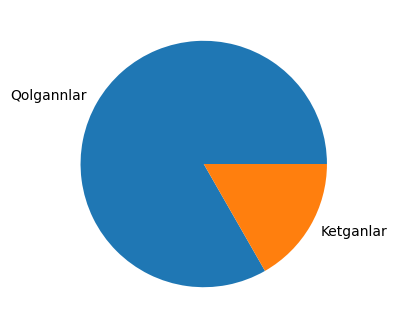

In [17]:
churn_rate=df['Churn'].value_counts()/len(df)*100
plt.figure(figsize=(6, 4))
plt.pie(churn_rate, labels=('Qolgannlar', 'Ketganlar'))
plt.show()

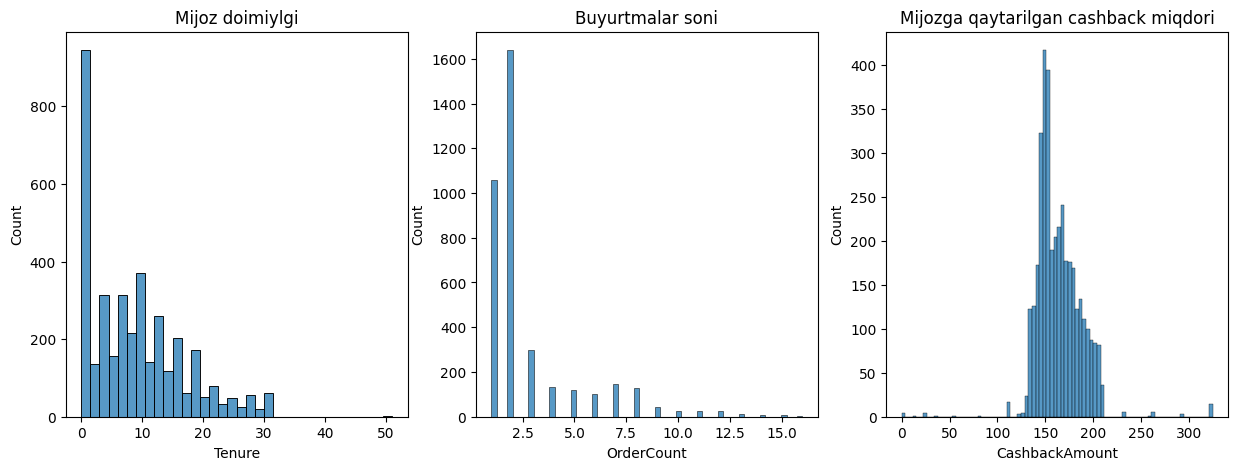

In [18]:
fig, axes=plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df,x= 'Tenure', ax=axes[0])
axes[0].set_title('Mijoz doimiylgi')
sns.histplot(data=df, x='OrderCount', ax=axes[1])
axes[1].set_title('Buyurtmalar soni')
sns.histplot(data=df, x='CashbackAmount', ax=axes[2])
axes[2].set_title('Mijozga qaytarilgan cashback miqdori')
plt.show()

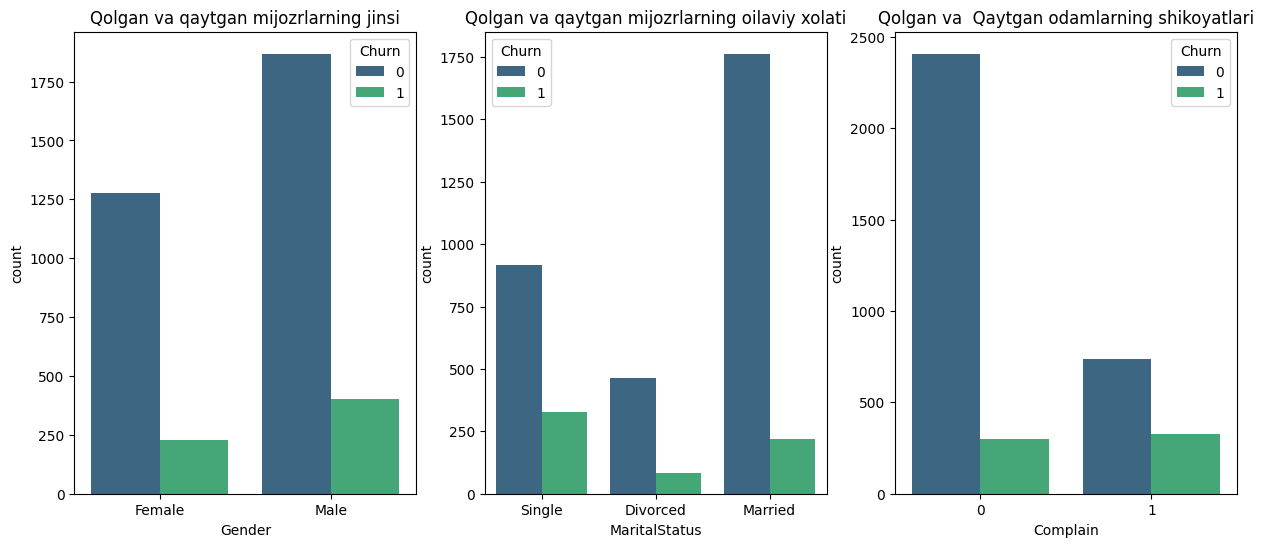

In [31]:
fig, axes = plt.subplots(1,3, figsize=(15,6))

sns.countplot(x='Gender', hue='Churn',  palette='viridis',  data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozrlarning oilaviy xolati")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Qolgan va  Qaytgan odamlarning shikoyatlari")

plt.show()

In [44]:
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]

In [45]:
data

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus,Gender
0,1,4.0,1,5.0,159.93,Single,Female
3,1,0.0,0,3.0,134.07,Single,Male
5,1,0.0,1,7.0,139.19,Single,Female
11,1,11.0,1,0.0,153.81,Single,Male
12,1,0.0,1,2.0,134.41,Single,Male
...,...,...,...,...,...,...,...
5624,0,1.0,0,1.0,154.66,Single,Female
5625,0,10.0,0,4.0,150.71,Married,Male
5627,0,1.0,1,4.0,186.42,Married,Male
5628,0,23.0,0,9.0,178.90,Married,Male


In [62]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
data['MaritalStatus']=encoder.fit_transform(data['MaritalStatus'])
data['Gender']=encoder.fit_transform(data['Gender'])

<ipython-input-62-8fae2876c861>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MaritalStatus']=encoder.fit_transform(data['MaritalStatus'])
<ipython-input-62-8fae2876c861>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender']=encoder.fit_transform(data['Gender'])


In [53]:
data.corrwith(data['Churn'])

ValueError: could not convert string to float: 'Single'

In [63]:
data.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus,Gender
0,1,4.0,1,5.0,159.93,2,0
3,1,0.0,0,3.0,134.07,2,1
5,1,0.0,1,7.0,139.19,2,0
11,1,11.0,1,0.0,153.81,2,1
12,1,0.0,1,2.0,134.41,2,1


In [67]:
data.corrwith(data['Churn']).abs().sort_values(ascending=False)

,0
Churn,1.000000
Tenure,0.340013
Complain,0.238137
DaySinceLastOrder,0.139254
MaritalStatus,0.134036
CashbackAmount,0.058756
Gender,0.033792


In [69]:
x=data.drop('Churn', axis=1)
y=data['Churn']

In [71]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [73]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=54)


#Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       617
           1       0.83      0.84      0.84       138

    accuracy                           0.94       755
   macro avg       0.90      0.90      0.90       755
weighted avg       0.94      0.94      0.94       755

Model aniqligi : 0.9403973509933775


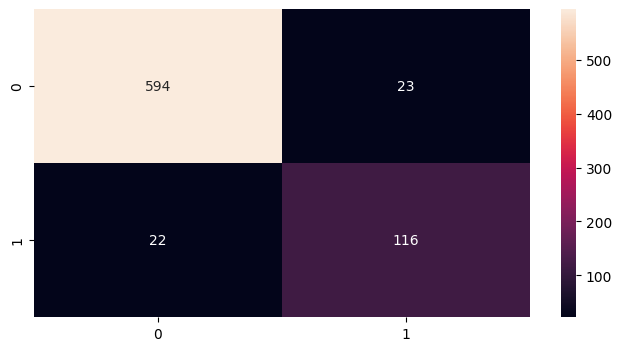

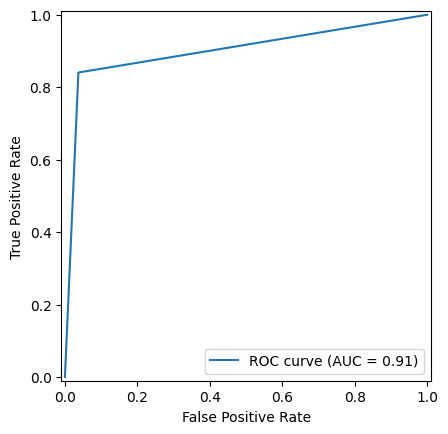

In [103]:
model_tree= DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
y_p=model_tree.predict(x_test)
print(metrics.classification_report(y_test, y_p))
print('Model aniqligi :', metrics.accuracy_score(y_test, y_p))
plt.figure(figsize=(8, 4))
sns.heatmap(metrics.confusion_matrix(y_test, y_p ), fmt='g', annot=True )
plt.show()
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_p)
roc_auc = metrics.auc(fp, tp)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

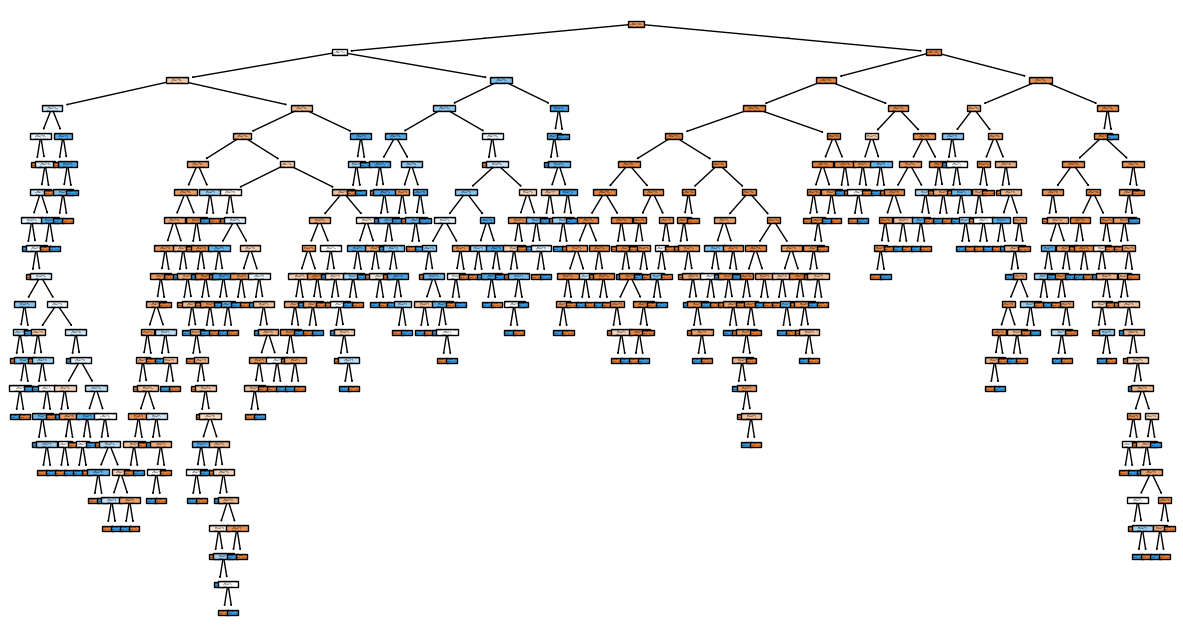

In [111]:
col= data.drop('Churn', axis=1).columns
plt.figure(figsize=(15, 8))
plot_tree(model_tree, feature_names=col, filled=True )
plt.show()

#Logistik Regression

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       617
           1       0.71      0.36      0.47       138

    accuracy                           0.86       755
   macro avg       0.79      0.66      0.69       755
weighted avg       0.84      0.86      0.84       755

Model aniqligi : 0.8556291390728477


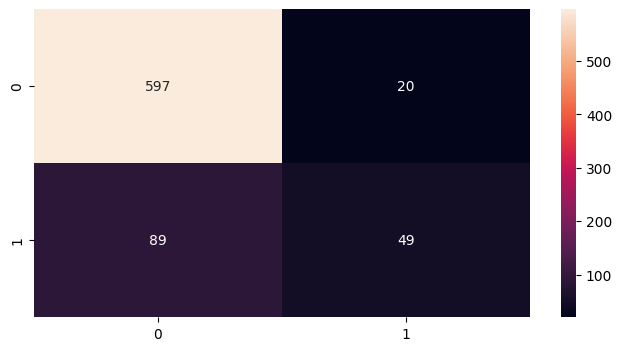

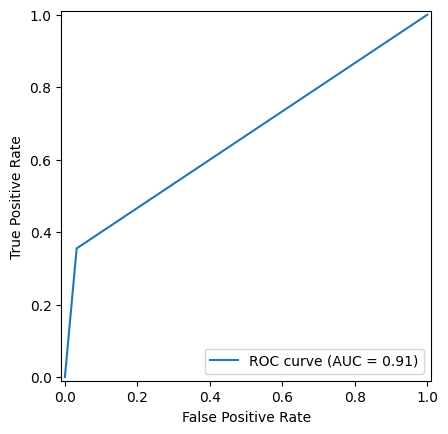

In [104]:
LR_model= LogisticRegression()
LR_model.fit(x_train, y_train)
y_p=LR_model.predict(x_test)
print(metrics.classification_report(y_test, y_p))
print('Model aniqligi :', metrics.accuracy_score(y_test, y_p))
plt.figure(figsize=(8, 4))
sns.heatmap(metrics.confusion_matrix(y_test, y_p ), fmt='g', annot=True )
plt.show()
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_p)
roc_auc = metrics.auc(fp, tp)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#Support Vektor Mashines

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       617
           1       0.72      0.36      0.48       138

    accuracy                           0.86       755
   macro avg       0.80      0.66      0.70       755
weighted avg       0.84      0.86      0.84       755

MODEL ANIQLIGI  : 0.856953642384106


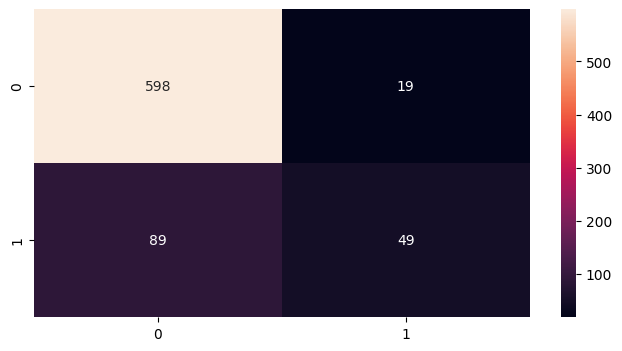

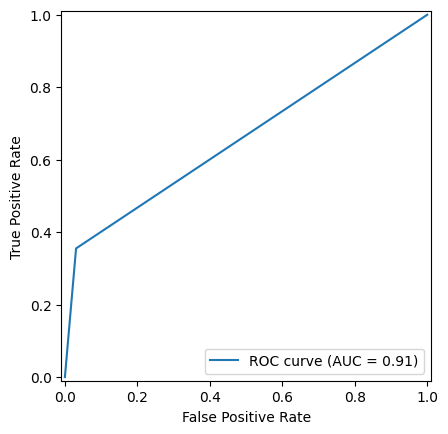

In [107]:
svm=SVC()
svm.fit(x_train, y_train)
y_p=svm.predict(x_test)
print(metrics.classification_report(y_test, y_p))
print('MODEL ANIQLIGI  :', metrics.accuracy_score(y_test, y_p))

plt.figure(figsize=(8, 4))
sns.heatmap(metrics.confusion_matrix(y_test, y_p ), fmt='g', annot=True )
plt.show()
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_p)
roc_auc = metrics.auc(fp, tp)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#Random Forest Classifier

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       617
           1       0.92      0.80      0.86       138

    accuracy                           0.95       755
   macro avg       0.94      0.89      0.91       755
weighted avg       0.95      0.95      0.95       755

Model aniqligi : 0.9509933774834437


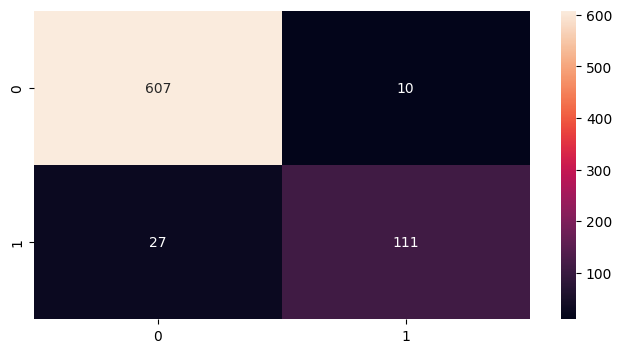

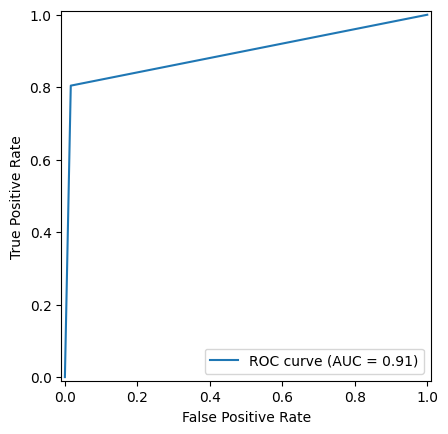

In [112]:
random_tree= RandomForestClassifier()
random_tree.fit(x_train, y_train)
y_p=random_tree.predict(x_test)
print(metrics.classification_report(y_test, y_p))
print('Model aniqligi :', metrics.accuracy_score(y_test, y_p))
plt.figure(figsize=(8, 4))
sns.heatmap(metrics.confusion_matrix(y_test, y_p ), fmt='g', annot=True )
plt.show()
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_p)
roc_auc = metrics.auc(fp, tp)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#XGB Classifier

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       617
           1       0.90      0.77      0.83       138

    accuracy                           0.94       755
   macro avg       0.92      0.87      0.90       755
weighted avg       0.94      0.94      0.94       755

Model aniqligi : 0.9417218543046357


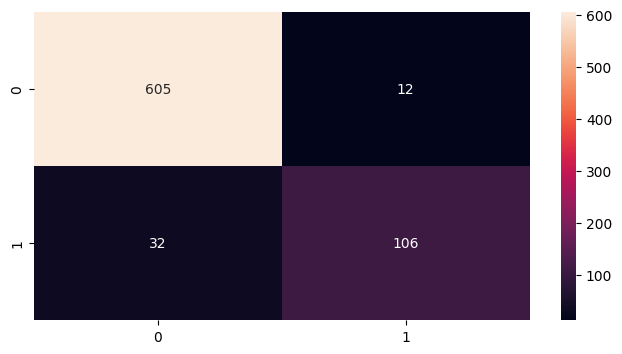

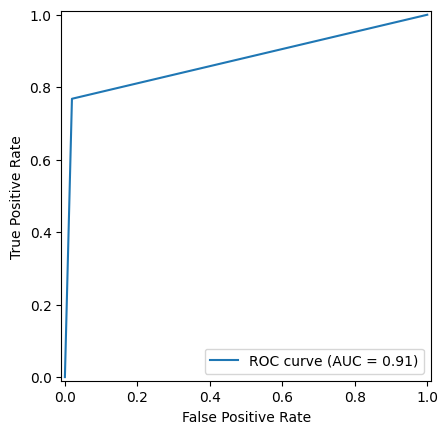

In [113]:
xgb_model=  XGBClassifier()
xgb_model.fit(x_train, y_train)
y_p=xgb_model.predict(x_test)
print(metrics.classification_report(y_test, y_p))
print('Model aniqligi :', metrics.accuracy_score(y_test, y_p))
plt.figure(figsize=(8, 4))
sns.heatmap(metrics.confusion_matrix(y_test, y_p ), fmt='g', annot=True )
plt.show()
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_p)
roc_auc = metrics.auc(fp, tp)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()